# **Loading the Data**

Questions:


*   Is this a large or small network for social media?

*   What might “4039 nodes” represent in real life?



In [1]:
import networkx as nx

# Load combined Facebook ego network
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# Print information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4039
Number of edges: 88234


# **Visualizing a Sample**

Question


*   What structural features look familiar from earlier lectures?



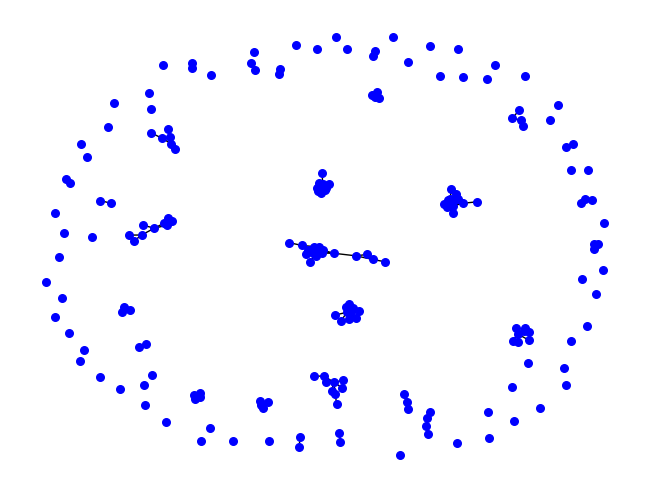

In [4]:
import random, matplotlib.pyplot as plt

nodes = random.sample(list(G.nodes()), 200)
H = G.subgraph(nodes)
nx.draw(H, node_size=30, node_color="blue",
        edge_color="black", with_labels=False)
plt.show()

# **Basic Network Statistics**

| Measure         | Meaning                                         |
| --------------- | ----------------------------------------------- |
| Clustering (C)  | Local group density – triangles / possible ties |
| Path length (L) | Average number of hops between people           |
| LCC             | Largest connected cluster                       |


In [6]:
print("Number of components:", nx.number_connected_components(G))

# Largest Connected Component (LCC)
LCC = G.subgraph(max(nx.connected_components(G), key=len))
print("LCC size:", LCC.number_of_nodes())

print("Average clustering:", nx.average_clustering(G))
print("Average path length (LCC):",
      nx.average_shortest_path_length(LCC))


Number of components: 1
LCC size: 4039
Average clustering: 0.6055467186200862
Average path length (LCC): 3.6925068496963913


# **Degree Distribution**

Questions:


*   Does it look like a Poisson distribution (ER)?

*   Or a power law (BA)?

*   What does that tell us about hubs in Facebook data?


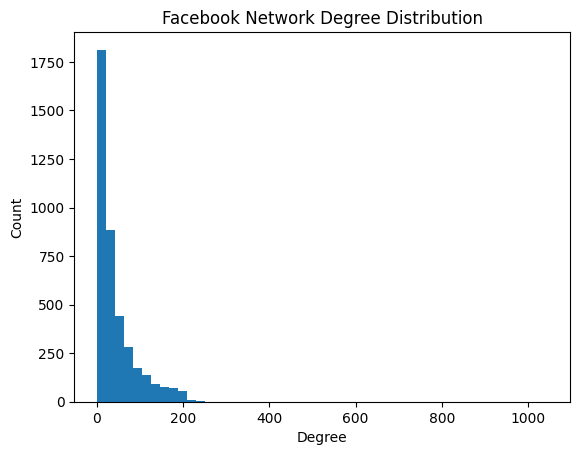

Text(0.5, 1.0, 'Degree Distribution (log–log)')

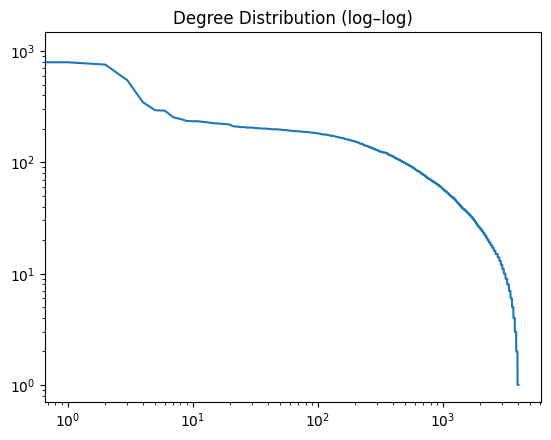

In [7]:
import matplotlib.pyplot as plt

degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=50)
plt.xlabel("Degree"); plt.ylabel("Count")
plt.title("Facebook Network Degree Distribution")
plt.show()

plt.loglog(sorted(degrees, reverse=True))
plt.title("Degree Distribution (log–log)")


# **Activity # 2**

Goal: Identify and interpret influential nodes

*   What do you notice about the degree values?

*   Are a few nodes extremely high compared to the rest?

*   Discuss: If this were a real social network, what kind of users might these be? (e.g., event organizers, public pages, or people who accept everyone’s friend request)

*   Does this pattern remind you more of BA or WS?



In [ ]:
sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]


[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254),
 (1800, 245),
 (1663, 235)]

# **Comparing with Model Networks**
We can now generate graphs with similar size (n = 4039, edges = 88k) for comparision.

In [11]:
n = 4039
ER = nx.erdos_renyi_graph(n, 88234/(n*(n-1)/2))
WS = nx.watts_strogatz_graph(n, 10, 0.1)
BA = nx.barabasi_albert_graph(n, 2)

for name, graph in [("Facebook", G), ("ER", ER),
                    ("WS", WS), ("BA", BA)]:
    C = nx.average_clustering(graph)
    # Get the largest connected component as a subgraph
    LCC = graph.subgraph(max(nx.connected_components(graph), key=len))
    L = nx.average_shortest_path_length(LCC)
    print(f"{name}: C={C:.3f}, L={L:.3f}")

Facebook: C=0.606, L=3.693
ER: C=0.011, L=2.607
WS: C=0.489, L=5.455
BA: C=0.006, L=4.811
